In [38]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess
import nolds
import scipy.optimize

####Set up network weights
a = 16
b = 12
d = 4
e = -2
# W = np.array([[a, e, e, -b, 0, 0], [e, a, 2*e, 0, -b, 0], [e, e, a, 0, 0, -b],
#               [a, 0, 0, -d, e, e], [0, a, 0, e, -d, 2*e], [0, 0, a, e, e, -d]])
# W = np.array([[a, e, e, -b, 0], [e, a, e, 0, -b], [e, e, a, -b, 0],
#               [a, 0, -d, -d, e], [0, a, e, e, -d]])
# W = np.array([[a, e, -b, e], [e, a, e, -b],
#               [a, 2*e, -d, e], [e, a, e, -d]]) 
# a,b,d=15,10,5
W = np.array([[a, 0, -b, 0], [0, a, 0, -b],
              [a, 0, -d, 0], [0, a, 0, -d]]) 
# W = np.array([[a, -b, 0, 0], [a, -d, 0, 0],
#               [0, 0, a, -b], [0, 0, a, -d]]) 
# W = array([[ a, -b,    0],
#            [ a,  -d ,  0],
#            [ 0,  0,   0]])
# W = np.zeros((5,5))
# W = np.loadtxt("WN4_chaos.txt", delimiter=',')
# W[4:,4:] = Wi
# W[:4,:4] = Wi
# W = Weights[75]#np.zeros((4,4))
# W = np.zeros((10,10))
# ps = [-1,-1,-1,-1,-4,-4]
# ps = [-1,-1,-4,-4]
# ps = [-1,-4,-np.pi]
N = W.shape[0]
if N == 15:
    ps = [-1,-1,-1,-1,-1,-1,-1,-1,-4,-4,-4,-4,-4,-4,-4]
if N == 10:
    ps = [-1,-1,-1,-1,-1,-4,-4,-4,-4,-4]
#     ps = [-2]*10
if N == 8:
    ps = [-1,-1,-4,-4,-1,-1,-4,-4]
if N == 6:
    ps = [-1,-1,-1,-4,-4,-4]
if N == 5:
    ps = [-1,-1,-1,-4,-4]
#     ps=[-2]*N
if N == 4:
    ps = [-1,-1,-4,-4]
if N == 3:
    ps = [-1,-4,-2]
    ps = [-1,-4,-1]
#     ps = [-1,-1,-1]

In [39]:
W

array([[ 16,   0, -12,   0],
       [  0,  16,   0, -12],
       [ 16,   0,  -4,   0],
       [  0,  16,   0,  -4]])

In [113]:
#make file to simulate Wilson-Cowan network with XPP
ksdm=-3
time=500
dt=0.05
P = 10
expn = 1
gamma = 10
Weights = []
datass = []
initss = []
# for expi in range(expn):
for expi in  np.linspace(-.8, -.8, num=expn):
#     Ws = W
#     rands =  np.random.randint(-gamma,gamma,size=(2))
#     Ws = expi*np.eye(N)+np.array([[0,0,0,0,rands[1]], [rands[1],0,0,0,rands[1]],[0,rands[1],0,0,0],[rands[1],0,rands[1],0,0],[0,0,rands[1],rands[1],0]])
#     Ws = 4*np.eye(N)+np.array([[0,0,0,0,rands[0]], [rands[1],0,0,0,rands[2]],[0,rands[3],0,0,0],[rands[4],0,rands[5],0,0],[0,0,rands[6],rands[7],0]])
#     Wp = np.random.choice([-10,-5,0,5,10,15], size=(N,N),p=[.05,.2, .4, .2, .1, .05])
#     Wp = np.random.randint(-gamma,gamma,size=(N,N))
#     Ws = W + Wp
    Wp = np.zeros((N,N))
#     np.fill_diagonal(Wp, -expi)
    Wp[0,-1] = ksdm
    Wp[1,-2] = ksdm
    Wp[2,-3] = ksdm
    Wp[3,-4] = ksdm
    Wp[0,1] = expi
    Wp[1,0] = expi
    Wp[2,3] = expi
    Wp[3,2] = expi
    Ws = W + Wp
#     Ws = W + np.fliplr(Wp)
#     Ws = W + gamma*(np.random.random(size=(N,N))-0.4)
    
    Weights.append(Ws)
    wcstring = cf.make_wc(Ws, ps, dt=dt)
    with open('wc_p.ode', 'w') as f:
        f.writelines(wcstring)

    datas = np.zeros((P, int(.1/dt)*time*10+1, N))
    data_length_list = []
    for j in range(P):
        inits = np.random.rand(N)
        initss.append(inits)
        inits_dict={}
        for i,init in enumerate(inits[:]):
            inits_dict['x'+str(i+1)]=init
        npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
        datas[j, :, :] = npa[:,1:].copy()
        data_length_list.append(npa[:,1:].shape[0])
    datass.append(datas)

<IPython.core.display.Javascript object>


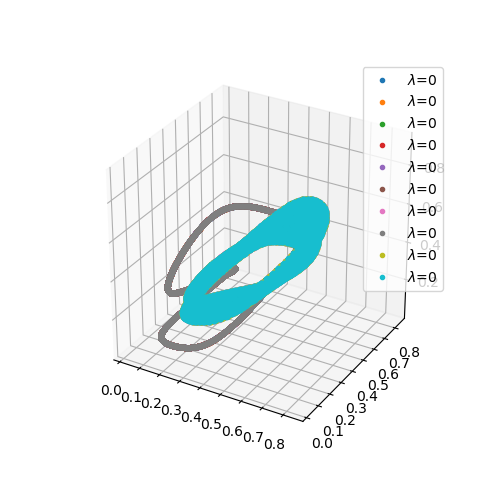

In [114]:
%matplotlib notebook
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
time=500
shift=int((int(.1/dt)*time*10+1)*.5)
til=int((int(.1/dt)*time*10+1)*.05)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(expn):
    for k in range(P):
#         ax.plot(datass[j][k,shift:til,0], datass[j][k,shift:til,1], datass[j][k,shift:til,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
        ax.plot(datass[j][k,shift:,0], datass[j][k,shift:,1], datass[j][k,shift:,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
        plt.legend()
plt.show()

In [180]:
Weights[3]
# W
# np.linspace(1.5, 3.5, num=expn)

array([[ 16.        ,  -0.86666667, -12.        ,  -3.        ],
       [ -0.86666667,  16.        ,  -3.        , -12.        ],
       [ 16.        ,  -3.        ,  -4.        ,  -0.86666667],
       [ -3.        ,  16.        ,  -0.86666667,  -4.        ]])

<IPython.core.display.Javascript object>


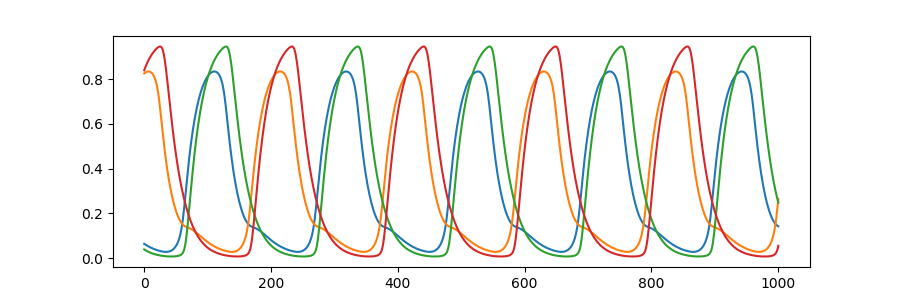

In [188]:
%matplotlib notebook
plt.figure(figsize=(9,3))
j=0
# for j in range(31,32, 10):
#     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
shift=int(20*time*0.9)
plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,1])
# for i in range(10):
#     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,i])
plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,2])
plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,3])

<IPython.core.display.Javascript object>


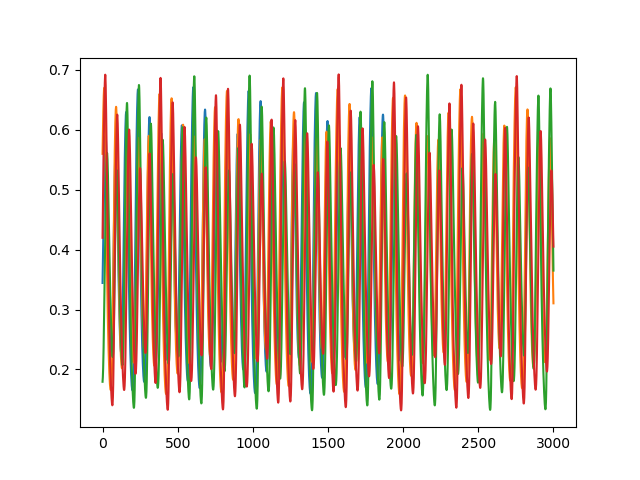

In [191]:
%matplotlib notebook
j=0
p=8
shift=int(20*time*0.7)
til=int(20*time*0.9)
plt.plot(range(datass[j][p,shift:til,0].shape[0]), datass[j][p,shift:til,0])
plt.plot(range(datass[j][p,shift:,0].shape[0]), datass[j][p,shift:,1])
plt.plot(range(datass[j][p,shift:,0].shape[0]), datass[j][p,shift:,2])
plt.plot(range(datass[j][p,shift:,0].shape[0]), datass[j][p,shift:,3])

In [7]:
x=datass[0][0,-1,:]
print(x)
print(cf.eval_wcode(x,Ws,ps))
print(datass[0][0,-1,:]-datass[0][0,-10,:])
np.linalg.eig(cf.jac(x,Ws,ps))[0]

[0.60909516 0.58526045 0.67349792 0.47369662]
[-0.38216914 -0.04235675  0.04089013  0.27718072]
[-0.04836785  0.05713123  0.10281462  0.14912307]


array([-0.38282806+0.j        , -0.61886985+0.j        ,
       -0.6747373 +0.05148205j, -0.6747373 -0.05148205j])

In [257]:
inits = np.random.rand(N)
initss.append(inits)
inits_dict={}
for i,init in enumerate(inits[:]):
    inits_dict['x'+str(i+1)]=init
npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)

<IPython.core.display.Javascript object>


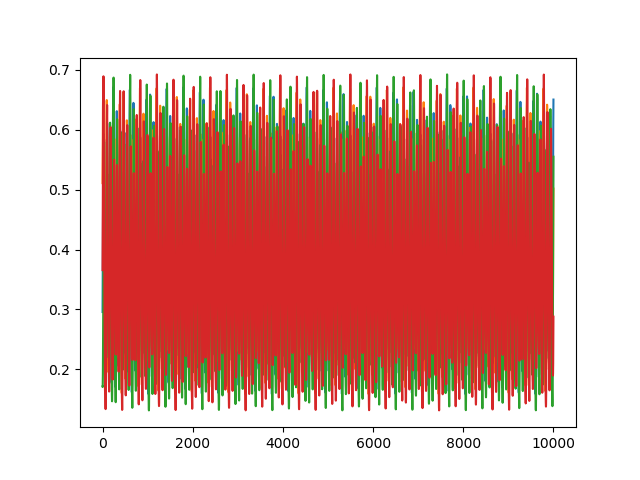

In [267]:
%matplotlib notebook
shift=int(20*time*0.9)
plt.plot(npa[shift:,1:])

In [262]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def F(x):
    return -x+sigmoid(Weights[0].dot(x)+np.array(ps))
x=scipy.optimize.broyden2(F, [.001]*4, f_tol=1e-14)
cf.eval_wcode(x, Weights[0], ps), x, np.linalg.eig(cf.jac(x,Weights[0],ps))[0]

(array([0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16]),
 array([0.40073511, 0.40073511, 0.36623845, 0.36623845]),
 array([ 0.26216331+0.j        , -0.42833335+0.64109985j,
        -0.42833335-0.64109985j, -0.83144528+0.j        ]))

In [490]:
# def jac(x,W,ps):
#     W=Weights[7]
#     J = np.zeros((N,N))
#     for i in range(N):
#         for j in range(N):
#             ins = np.dot(W[i,:], x)+ps[i]
#             J[i,j] = W[i,j]*sigmoid(ins)*(1-sigmoid(ins))
#     return J
# def fn(x):
#     return sigmoid(Weights[7].dot(x)+np.array(ps))

# def F(x,W,ps):
#     return -x+sigmoid(W.dot(x)+np.array(ps))
# # x=scipy.optimize.fixed_point(fn, [0.8]*N, maxiter=10000)
# x=scipy.optimize.root(F, [0.5]*N, args=(W,ps), method='hybr', jac=jac, tol=1e-14) 
# cf.eval_wcode(x, Weights[7], ps), x

In [152]:
np.linalg.eig(Weights[0])[0]

array([11.+8.42614977j, 11.-8.42614977j,  1.+9.74679434j,  1.-9.74679434j])

In [418]:
# import scipy
# scipy.linalg.null_space(Weights[6])

In [8]:
time=5000
Ws = Weights[0]
wcstring = cf.make_wc(Ws, ps, dt=dt)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
data_length_list = []
inits = x+np.array([0,0,0.,0.])#initss[7]#[0]*N#npa[-1,1:]#x#np.random.rand(N)#
inits_dict={}
for i,init in enumerate(inits[:]):
    inits_dict['x'+str(i+1)]=init
npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
data_length_list.append(npa[:,1:].shape[0])

<IPython.core.display.Javascript object>


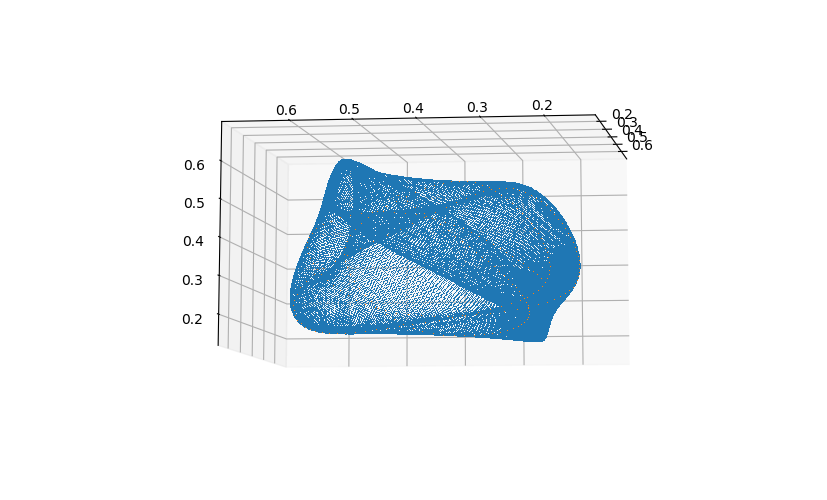

In [10]:
%matplotlib notebook
shift=int(time*0.)
til=int(time*.05)
fr=10
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
plt.plot(npa[shift:,1], npa[shift:,2], npa[shift:,3], ',')
plt.plot(npa[fr:til,1], npa[fr:til,2], npa[fr:til,3], ',')
# plt.axis('off')
plt.show()

In [429]:
npa[-1,1:]-x

array([ 0.14573617,  0.20667786, -0.04703201,  0.27459164])

In [422]:
np.linalg.eig(cf.jac(x,Weights[7],ps))[0]

array([1.44244689+1.0730015j , 1.44244689-1.0730015j ,
       1.44244689+2.09137264j, 1.44244689-2.09137264j])

In [167]:
# %matplotlib notebook
# shift=int(time*19.)
# til=int(time*1.)
# fig = plt.figure(figsize=(5,5))
# plt.plot(npa[shift:,2], npa[shift:,3], ',')
# plt.plot(npa[100:til,2], npa[100:til,3], '-')
# plt.axis('off')
# plt.show()

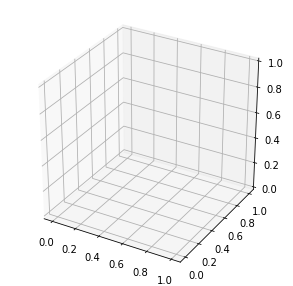

In [8]:
emb=cf.embed(data=npa[:,1], dim=3, tau=25, shift=0)
shift=10000
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
plt.plot(emb[shift:,0], emb[shift:,1], emb[shift:,2], '.')
plt.show()

In [208]:
# %matplotlib notebook
# shift=int(time*19.)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# plt.plot(npa[shift:,2], npa[shift:,3], npa[shift:,4], '.')
# plt.show()

<IPython.core.display.Javascript object>


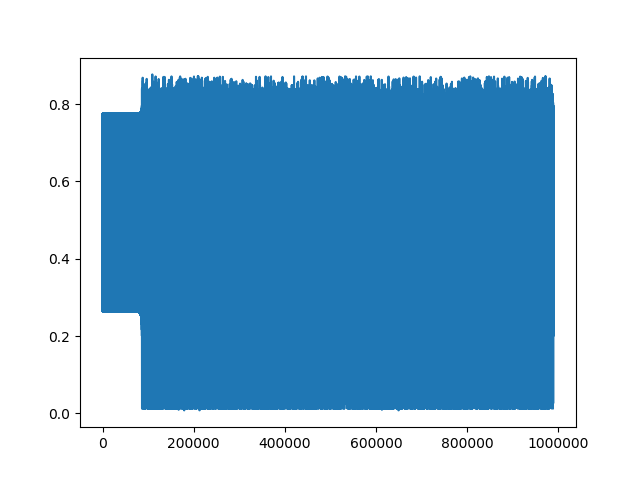

In [175]:
%matplotlib notebook
shift=int(time*19.5)
plt.plot(npa[10000:,1],'-')

In [146]:
npa[1000::1000,1].shape

(1000,)

In [147]:
from ripser import ripser
from persim import plot_diagrams
from sklearn.manifold import Isomap

<IPython.core.display.Javascript object>


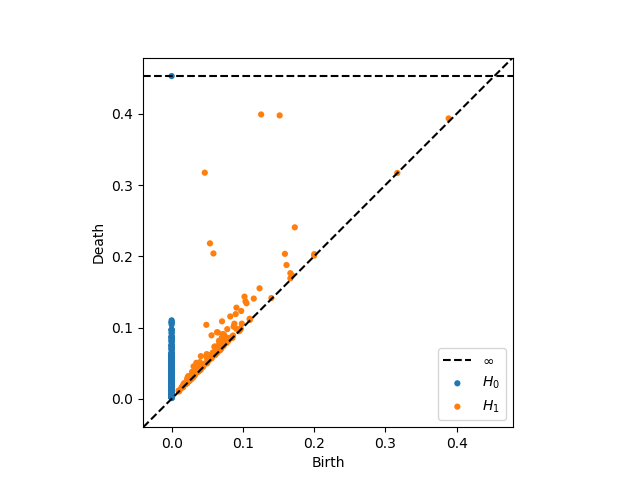

In [148]:
%matplotlib notebook

dgms=ripser(npa[10000::1000,1:],maxdim=1)['dgms']#
plot_diagrams(dgms, show=True)

In [23]:
X = npa[-500:,1:]
X.shape
embedding = Isomap(n_components=3)
X_transformed = embedding.fit_transform(X[:])
X_transformed.shape

(500, 3)

<IPython.core.display.Javascript object>


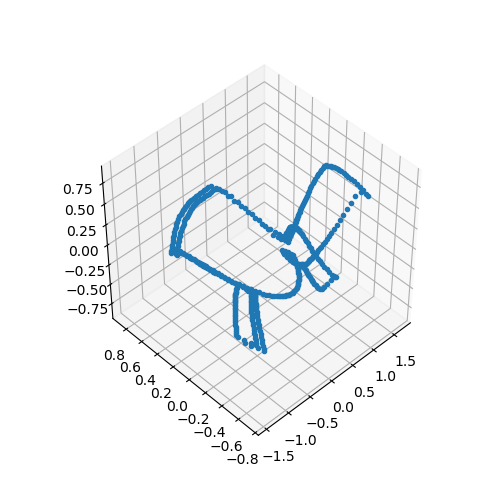

In [24]:
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
plt.plot(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], '.')
plt.show()

In [82]:
# P=100
# time=500
# Ws = Weights[2]
# wcstring = cf.make_wc(Ws, ps)
# with open('wc_p.ode', 'w') as f:
#     f.writelines(wcstring)
# datas = np.zeros((P, 20*time+1, N))
# for j in range(P):
#         inits = np.random.rand(N)
# #         print(j, inits)
#         inits_dict={}
#         for i,init in enumerate(inits[:]):
#             inits_dict['x'+str(i+1)]=init
#         npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
#         datas[j, :, :] = npa[:,1:].copy()
#         data_length_list.append(npa[:,1:].shape[0])

<IPython.core.display.Javascript object>


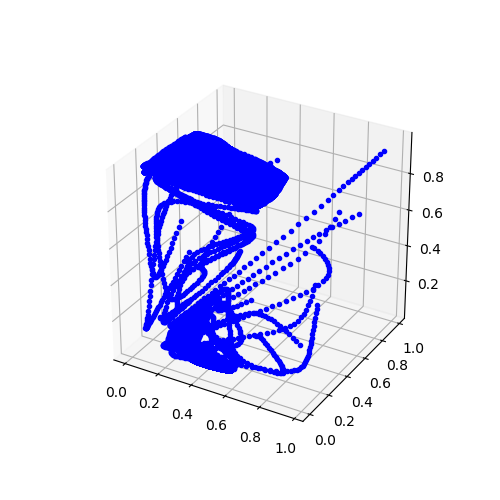

In [222]:
# %matplotlib notebook
# colors = ['b', 'g', 'r', 'c', 'm', 'y']
# shift=int(time*0)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for k in range(P):
#     ax.plot(datas[k,shift:,0], datas[k,shift:,1], datas[k,shift:,2], '.', c=colors[j%6], label=str(j)+':'+str(k))
# # plt.legend()
# plt.show()

In [160]:
# np.savetxt("WN3_spikish2.txt", Weights[19], delimiter=',')
np.savetxt("WN4_spiking2.txt", Weights[11], delimiter=',')
# W = np.loadtxt("WN6_chaos_4.txt", delimiter=',')

In [129]:
# nolds.lyap_r(npa[:,1])

In [45]:
# datass

In [115]:
#Make combinatorial dynamical system from the data
shift=int(time*1.)
# hdatas = np.array(datass).reshape(P*(expn*time*20+1),N)#npa[:shift,1:]
# hdatas = np.array(datass[7]).reshape(-1,N)
hdatas = np.array(npa[:,1:]).reshape(-1,N)
# data_length_list = [npa[:,1:].shape[0]]
nbins = 2**5
delta = 1/nbins
print(delta)
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(hdatas[:,:], nbins, data_length_list, calc_matrix=True)

0.03125


In [116]:
# for node in cds.G.nodes():
#     print(node,cds.G.out_edges(node))
#     for n in cds.G.out_edges(node):
#         for i in n[1]:
#             print(i)

In [117]:
# cds.G.edges((5, 6, 6, 8))
# mini=np.min(np.array([n for n in cds.G.neighbors((5, 6, 6, 8))]),axis=0)
# maxi=np.max(np.array([n for n in cds.G.neighbors((5, 6, 6, 8))]),axis=0)
# print(mini, maxi)
# diff = maxi-mini
# cases = [[]]
# for n in range(N):
#     casesp = []
#     for c in cases:
#         for i in range(diff[n]+1):
#             a = c.copy()
#             a.append(i)
#             casesp.append(a)
#             print(casesp)
#     cases = casesp
#     print(cases)

In [118]:
# len(cases)
# convexhull = []
# for c in cases:
#     convexhull.append(np.array(mini)+np.array(c))

In [119]:
# cds.hullG = nx.DiGraph()
# for node in cds.G.nodes():
# #     cds.G.edges((5, 6, 6, 8))
#     mini=np.min(np.array([n for n in cds.G.neighbors(node)]),axis=0)
#     maxi=np.max(np.array([n for n in cds.G.neighbors(node)]),axis=0)
# #     print(mini, maxi)
#     diff = maxi-mini
#     cases = [[]]
#     for n in range(N):
#         casesp = []
#         for c in cases:
#             for i in range(diff[n]+1):
#                 a = c.copy()
#                 a.append(i)
#                 casesp.append(a)
# #                 print(casesp)
#         cases = casesp
# #         print(cases)
#     convexhull = []
#     for c in cases:
#         b=np.array(mini)+np.array(c)
#         convexhull.append(b)
#         cds.hullG.add_edge(tuple(node), tuple(b))

In [120]:
# cds.G = cds.hullG

In [121]:
# cds.hullG.edges()

<IPython.core.display.Javascript object>


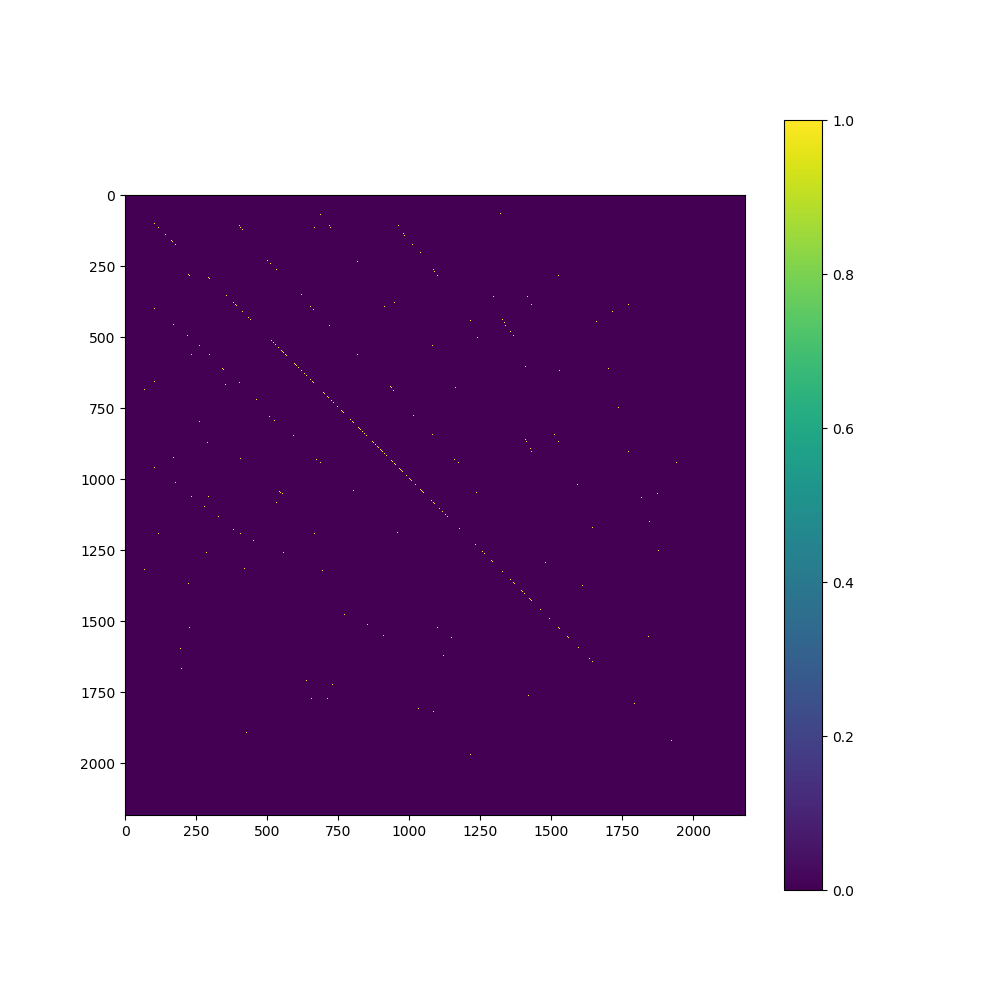

<IPython.core.display.Javascript object>


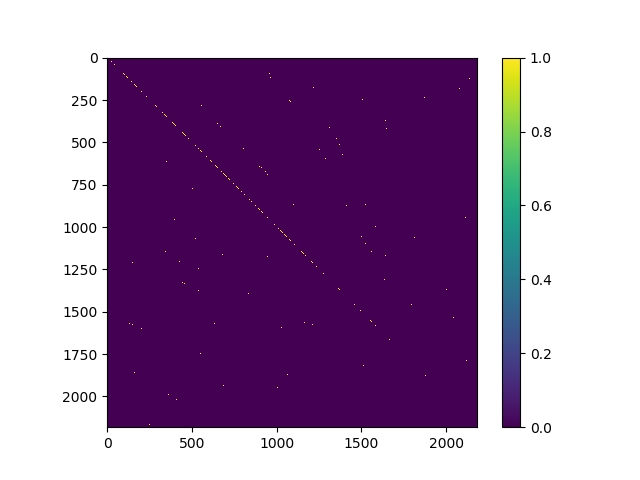

In [153]:
B = cds.A.toarray()/1.
fig = plt.figure(figsize=(10,10))
plt.imshow(np.where(np.linalg.matrix_power(B,2)>1,1,0))
plt.colorbar()
fig = plt.figure()
plt.imshow(np.linalg.matrix_power(B,1))
plt.colorbar()

In [147]:
np.where(np.linalg.matrix_power(B,2))[0].shape

(12824,)

In [145]:
cds.index_cube_dict = {v: k for k, v in cds.cube_ind_dict.items()}
cds.index_cube_dict[2181]

(16, 19, 8, 16)

In [15]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components(includeselfedges=False)
len(RCs)

1

<IPython.core.display.Javascript object>


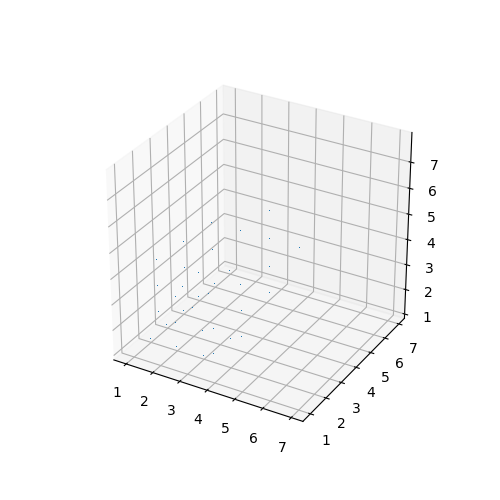

In [67]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(RCs)):
    plt.plot((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta), ',', label=i+1)
plt.show()

<IPython.core.display.Javascript object>


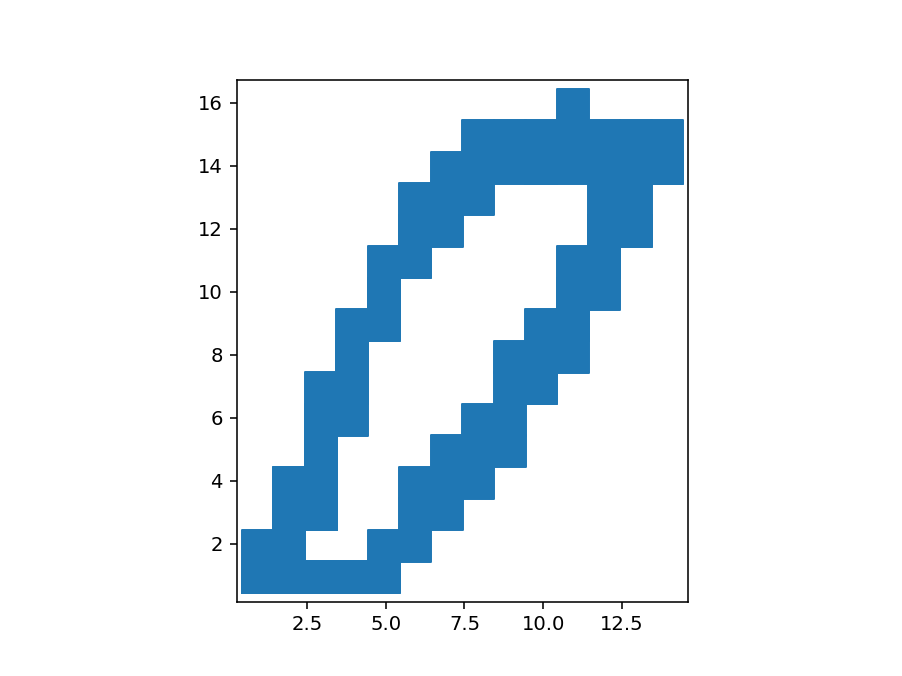

In [17]:
fig, ax = plt.subplots(dpi=141)
for i in range(len(RCs)):
    
    ax.set_aspect(1)
    fig.canvas.draw()
    s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
    plt.scatter((np.array(RCs[i])[:,0]-delta), (np.array(RCs[i])[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [68]:
RCs = cds.get_recurrent_components(includeselfedges=False)

RPcubes = {}

for i in range(0,len(RCs)):#range(0,1)
    RPcubes[i] = []
    print("Component", i+1)
    RPcubes[i].append(RCs[i])
    
    #Get (isolated) neighbourhood (candidate) around recurrent set
    Nbhd = RPcubes[i][0]
    print("Finding isolated nbhd")
    S = cds.invariantPart(Nbhd)
    M = cds.cubical_wrap(S).intersection(cds.G.nodes())
#     for mstep in range(1):
#         M = cds.cubical_wrap(M).intersection(cds.G.nodes())
    
    #calculate index pair
    try:
        print("Calculating index pair")
        P1, P0, Pbar1, Pbar0 = cds.index_pair(M)
    
        #write index pairs to file for Conley index calcualtion with CHomP
        
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)
        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        print("Calculating homology")
        
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
                                 'rc%s_P1_cubes.cub'%(i+1),
                                 'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

        linenum = 0
#         print(proc.stdout.readlines())
        while True:
            line = proc.stdout.readline()
            if not line:
                break
#             print("           "+line.rstrip().decode('UTF-8'))
            if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':
                
                print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1
            
    except Exception as e:
        if e=='too many values to unpack (expected 4)':
            print('Faile')
        else:
            print(e)

Component 1
Finding isolated nbhd
Calculating index pair
Calculating homology
           H_0 = Z
           H_1 = Z
           H_0 = Z
           H_1 = Z
           Dim 0:	f (x1) = y1
           Dim 1:	f (x1) = -y1
           Dim 0:	i (x1) = y1
           Dim 1:	i (x1) = -y1
           Dim 0:	I (y1) = x1
           Dim 1:	I (y1) = -x1
           Dim 0:	F (x1) = x1
           Dim 1:	F (x1) = x1


In [69]:
proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
#                                  'rc%s_P1_cubes.cub'%(i+1),
#                                  'rc%s_P0_cubes.cub'%(i+1)
                        ],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading the domain of the map from 'rc1_P1_map.map'... 265 cubes read.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           Reducing full-dim cubes from X... .         *         141 removed, 124 left.
           Note: The program assumes that the input map is acyclic.
           Reading the map on X from 'rc1_P1_map.map'... Done.
           Verifying if the image of X is contained in Y... Passed.
           Computing the image of the map... and of the inclusion... 198 cubes.
           Reducing full-dim cubes from Y... .         67 removed, 198 left.
           Transforming X into cells... 124 cells added.
           Transforming Y into cells... 198 cells added.
           Collapsing faces in X... .... 7492 removed, 744 left.
           Note: The dimension of X decrease

In [70]:
i=0
proc = subprocess.Popen(['homcubes', 'rc%s_P1_cubes.cub'%(i+1), 
                                    'rc%s_P0_cubes.cub'%(i+1)],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Note: The empty file 'rc1_P0_cubes.cub' is assumed to contain cubes.
           Reading cubes to X from 'rc1_P1_cubes.cub'... 265 cubes read.
           Reading cubes to A from 'rc1_P0_cubes.cub'... 0 cubes read.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           Reducing full-dim cubes from X... .         0*         0 141 removed, 124 left.
           197 bit fields for dimension 4 were used.
           Transforming X into cells... 124 cells added.
           Collapsing faces in X... 4*.3*.2*.1*. 7504 removed, 732 left.
           Note: The dimension of X decreased from 4 to 1.
           Creating the chain complex of X... . Done.
           Vertices used: 1441 of dim 4.
           Time used so far: 0.09 sec (0.001 min).
           Comp